# Boomerang Cryptanalysis of CRAFT

**Life truly is a boomerang. What you give, you get!**

Author: Hosein Hadipour

# Define CRAFT's S-box

In [16]:
reset()
from sage.crypto.sboxes import SBox
sb = SBox([0xc, 0xa, 0xd, 0x3, 0xe, 0xb, 0xf, 0x7, 0x8, 0x9, 0x1, 0x5, 0x0, 0x2, 0x4, 0x6])
ddt = sb.difference_distribution_table()
bct = sb.boomerang_connectivity_table()

In [17]:
sample = "0x0000000000A00000"
ios = [0]*15
for i in range(1, 16):
    ios[i - 1] = sample.replace('A', hex(i)[2:])
# ios

In [18]:
with open('possible_ios.txt', 'w') as fileobj:
    for i in range(15):
        fileobj.write(ios[i])
        fileobj.write('\n')

In [19]:
r7_th = load('r7_th.sobj')

In [20]:
r7_exp = load('r7_exp.sobj')

In [24]:
# 0: Theoretical
# 1: Empirical
flag = 0
if (flag == 0):
    r7 = r7_th
else:
    r7 = r7_exp

In [25]:
R7r = load('R7r.sobj')

<a name="middle_7r"></a>
# Em-7 Rounds

In [9]:
# pretty_print(r7)

In [10]:
# st_first = '\%s\%s' % ('left(', 'begin{array}{rrrrrrrrrrrrrrr}')
# st = ""
# st_last = '\%s\%s' % ('end{array}', 'right)')
# for i in range(15):
#     for j in range(15):
#         st += "2^{%0.2f}" % (r7_exp[i, j])
#         if j != 14:
#             st += ' & '
#     if i != 14:
#         st += '\\newline'
# st = st_first + st + st_last

In [11]:
from matplotlib.colors import NoNorm, LightSource, LinearSegmentedColormap
cMap = []
for value, colour in zip([0, 4, 9, 10, 12, 20],["White", "lime", "greenyellow", "khaki", "yellow", "gold"]):
    cMap.append((value/20, colour))
customColourMap = LinearSegmentedColormap.from_list("custom", cMap)
from matplotlib import cm

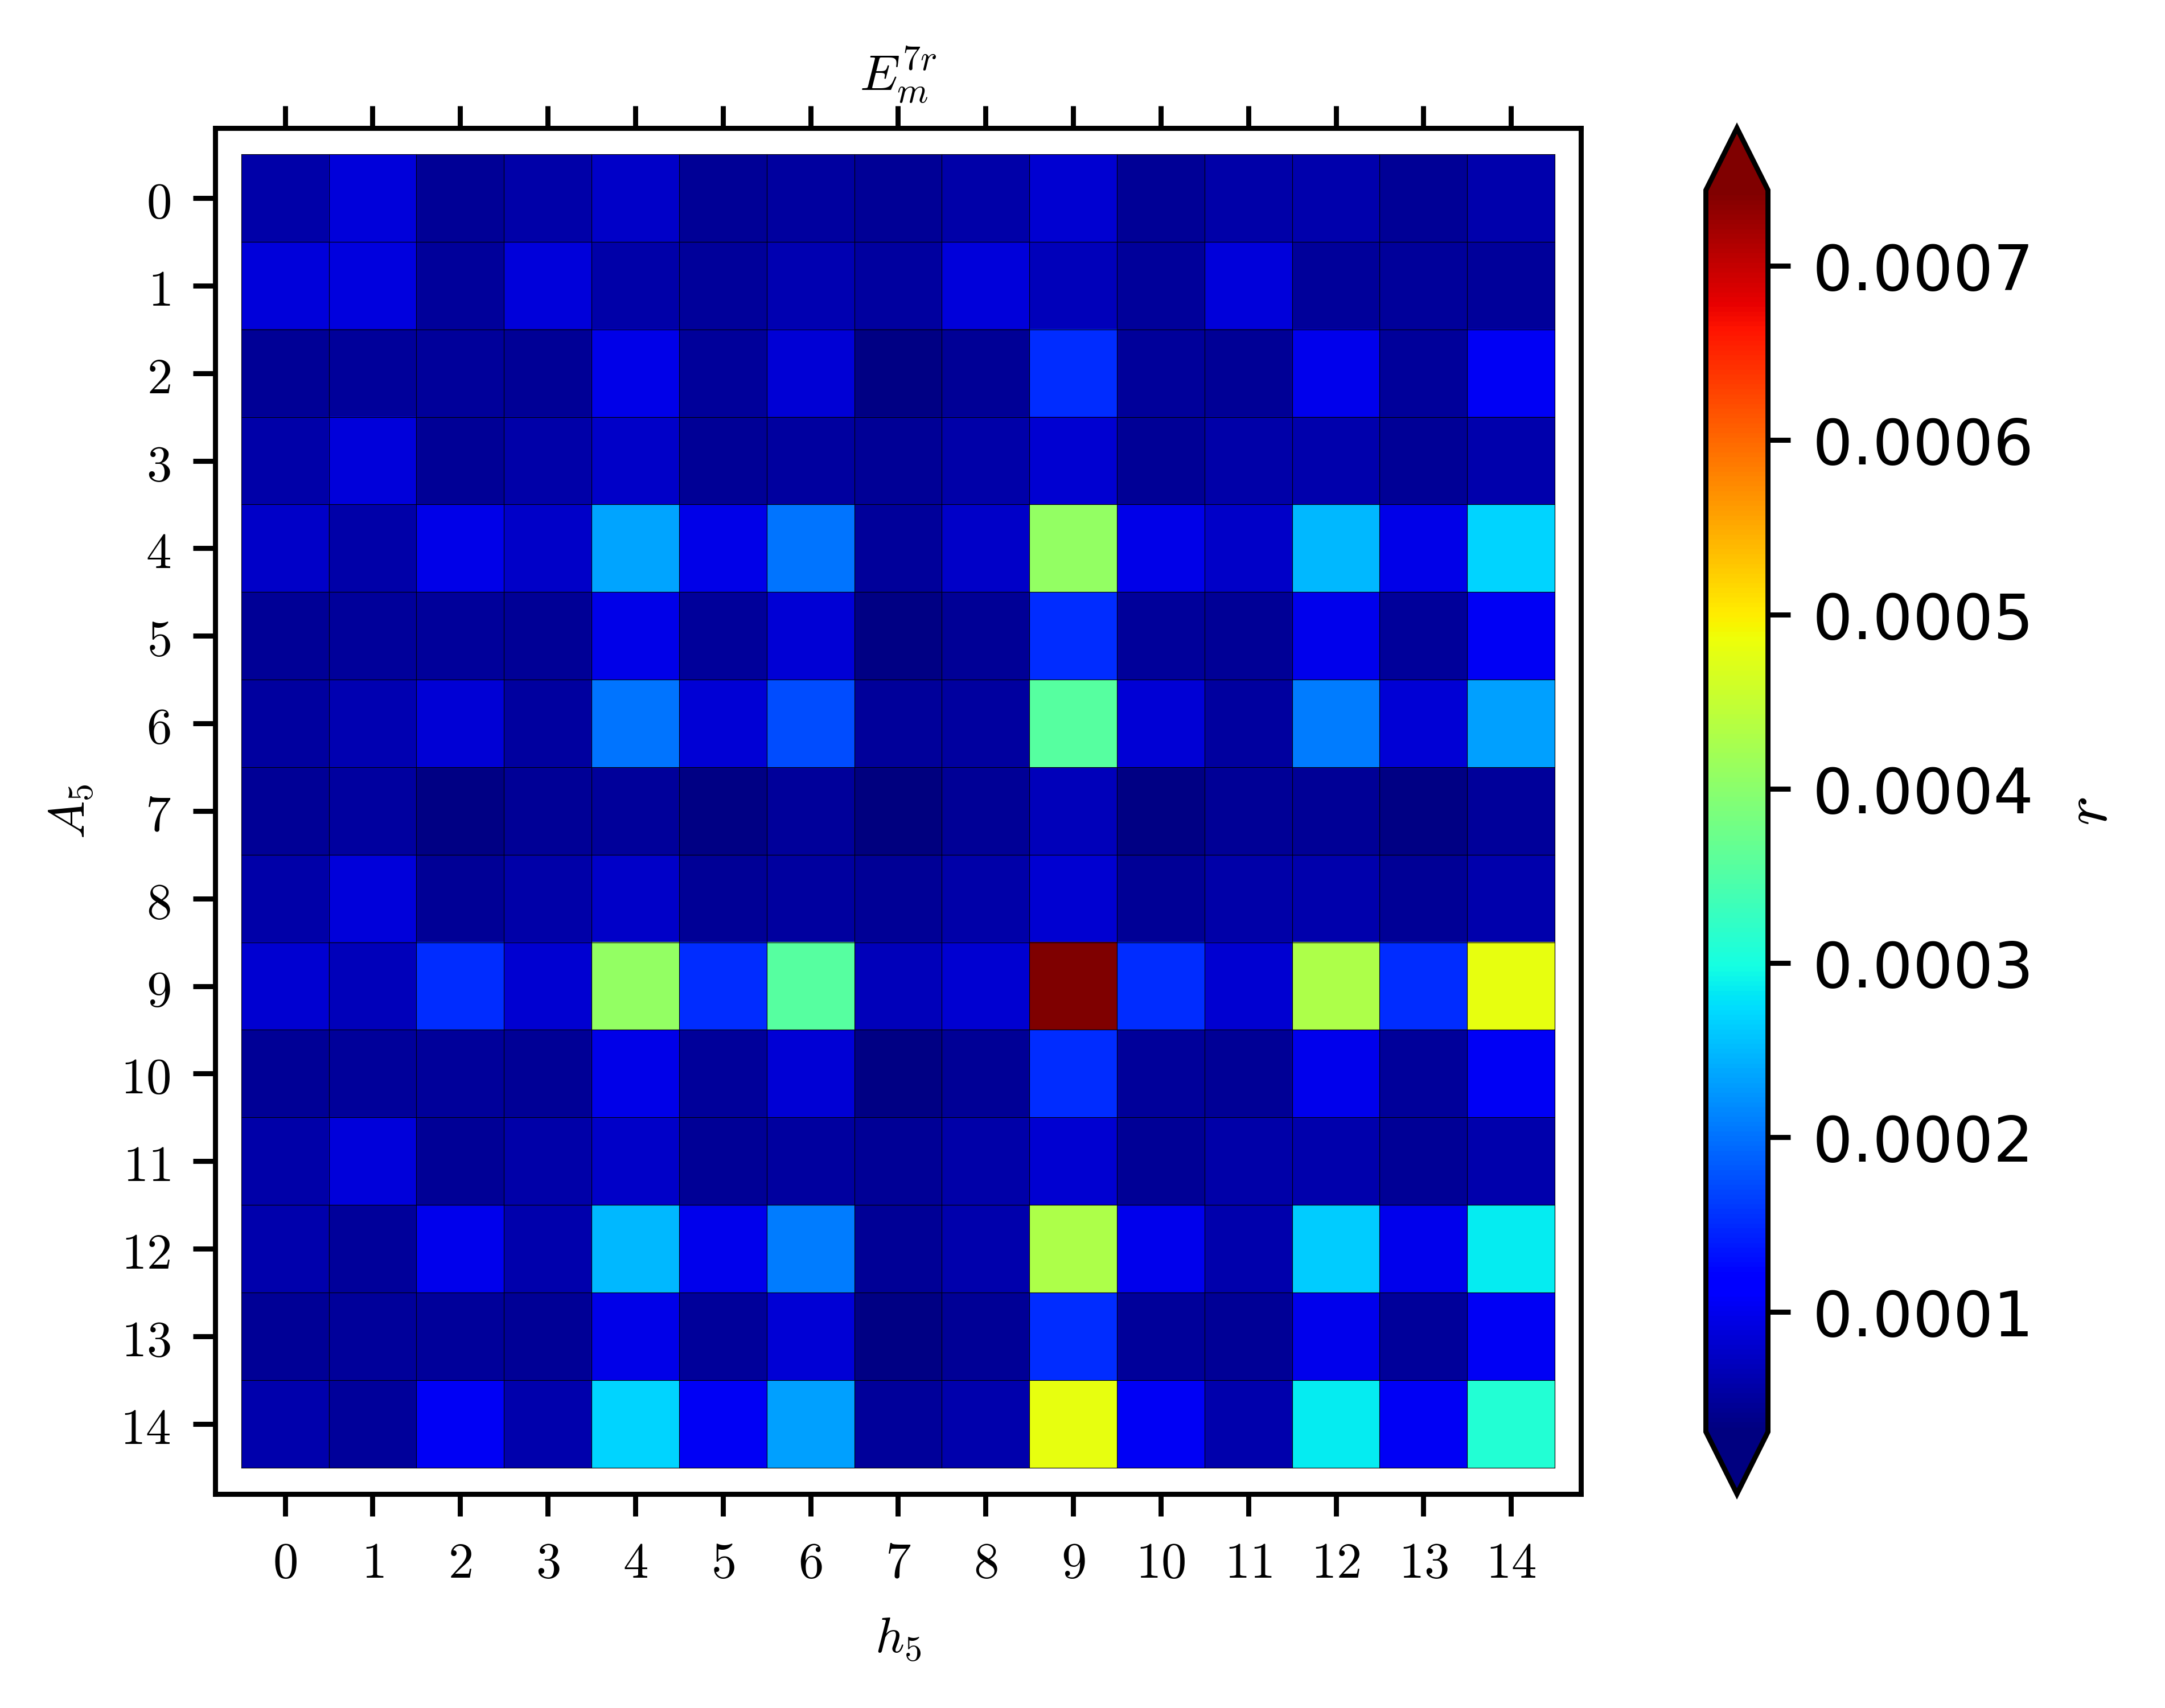

In [22]:
data = [[i, j] for i in range(15) for j in range(15)]
m = matrix(RR, 15,15)
for x,y in data:
    m[x, y] = r7[x, y]
v_max = max(m.list())
v_min = min(m.list())
v_tixks = list(range(0, 15, 1))#[x for x in range(100) if v_max in m[x, :].list()]
h_tixks = list(range(0, 15, 1))#[y for y in range(100) if v_max in m[:, y].list()]
m_plot_middle_7r = matrix_plot(m, subdivisions = True, cmap = cm.jet,
                               flip_y = False,
                               ticks = [h_tixks, v_tixks], tick_formatter = ["latex", "latex"],
                               vmin = v_min, vmax = v_max, subdivision_boundaries=[range(101),range(101)], 
                               subdivision_style=[dict(linestyle = '-', color = 'black',thickness=0.1),
                                                  dict(linestyle = '-', color = 'black', thickness=0.1)], 
                               colorbar = True, colorbar_options={'shrink':1,
                                                                  'label' : '$r$',
                                                                  'extend' : 'both',
                                                                  'drawedges' : False},
                               title = '$E^{7r}_{m}$', frame = true, fontsize = 8, dpi = 800, 
                               axes_labels = ('$h_{5}$', "$A_{5}$"), axes_labels_size = 1,
                               xmin = -0.5, xmax = 14.5, ymin = 14.5, ymax = -0.5)
m_plot_middle_7r.save_image('middle_7r_prob_matrix_image.svg')
m_plot_middle_7r.show()

## Visual Representation for BCT of CRAFT's S-box

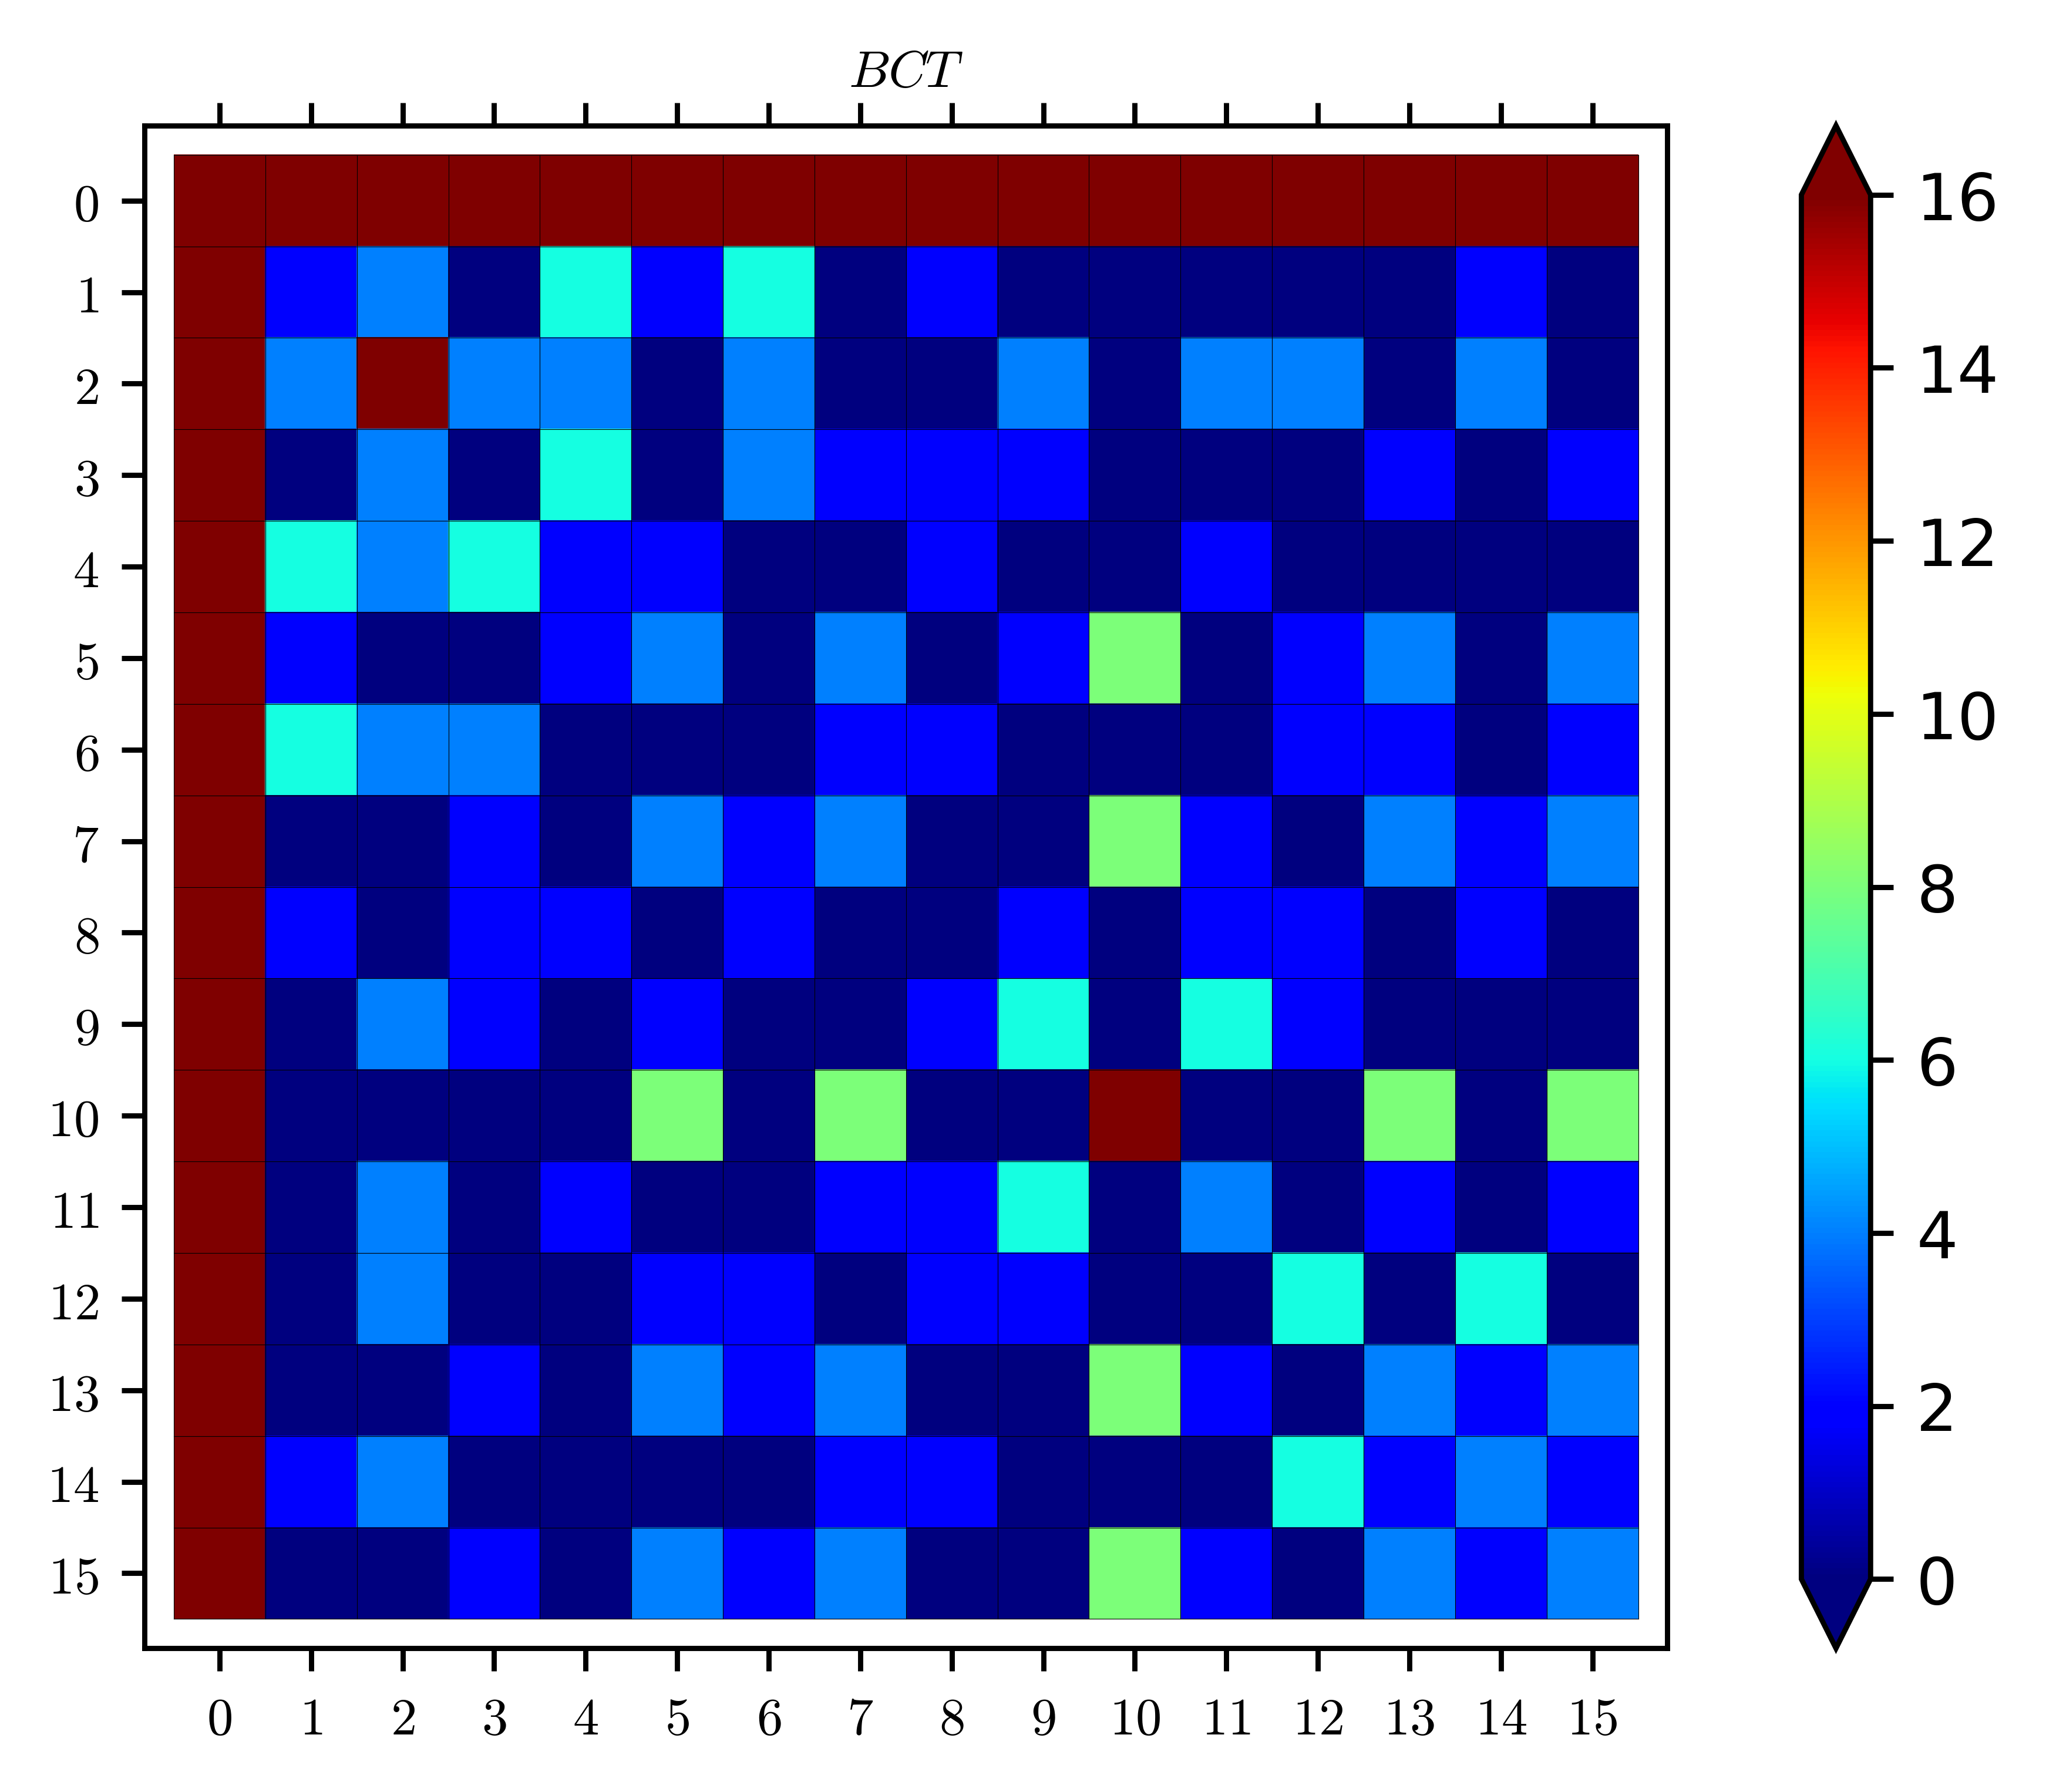

In [23]:
data = [[i, j] for i in range(16) for j in range(16)]
m = matrix(RR, 16,16)
bounds = range(17)
for x,y in data:
    m[x,y] = bct[x, y]
v_max = max(m.list())
v_min = min(m.list())
v_tixks = list(range(0, 16, 1))#[x for x in range(100) if v_max in m[x, :].list()]
h_tixks = list(range(0, 16, 1))#[y for y in range(100) if v_max in m[:, y].list()]
m_plot_middle_7r = matrix_plot(m, subdivisions = True, cmap = cm.get_cmap('jet', ),
                               flip_y = False,
                               ticks = [h_tixks, v_tixks], tick_formatter = ["latex", "latex"],
                               vmin = v_min, vmax = v_max, subdivision_boundaries=[range(101),range(101)], 
                               subdivision_style=[dict(linestyle = '-', color = 'black',thickness=0.1),
                                                  dict(linestyle = '-', color = 'black', thickness=0.1)], 
                               colorbar = True,
                               colorbar_options={'shrink': 1,
                                                  'label' : '',
                                                  'extend' : 'both'},
#                                                   'ticks' : bounds,
#                                                   'boundaries' : bounds,
#                                                   'drawedges' : True,
#                                                   'spacing' : 'uniform'},
                               title = '$BCT$', frame = true, fontsize = 8, dpi = 800, 
                               xmin = -0.5, xmax = 15.5, ymin = 15.5, ymax = -0.5)
m_plot_middle_7r.save_image('bct.svg')
m_plot_middle_7r.show()

In [24]:
bct

[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16]
[16  2  4  0  6  2  6  0  2  0  0  0  0  0  2  0]
[16  4 16  4  4  0  4  0  0  4  0  4  4  0  4  0]
[16  0  4  0  6  0  4  2  2  2  0  0  0  2  0  2]
[16  6  4  6  2  2  0  0  2  0  0  2  0  0  0  0]
[16  2  0  0  2  4  0  4  0  2  8  0  2  4  0  4]
[16  6  4  4  0  0  0  2  2  0  0  0  2  2  0  2]
[16  0  0  2  0  4  2  4  0  0  8  2  0  4  2  4]
[16  2  0  2  2  0  2  0  0  2  0  2  2  0  2  0]
[16  0  4  2  0  2  0  0  2  6  0  6  2  0  0  0]
[16  0  0  0  0  8  0  8  0  0 16  0  0  8  0  8]
[16  0  4  0  2  0  0  2  2  6  0  4  0  2  0  2]
[16  0  4  0  0  2  2  0  2  2  0  0  6  0  6  0]
[16  0  0  2  0  4  2  4  0  0  8  2  0  4  2  4]
[16  2  4  0  0  0  0  2  2  0  0  0  6  2  4  2]
[16  0  0  2  0  4  2  4  0  0  8  2  0  4  2  4]

In [25]:
print('bct[A][A]= %d' % bct[10][10])
print('bct[2][2]= %d' % bct[2][2])

bct[A][A]= 16
bct[2][2]= 16


## Visual Representation for DDT of CRAFT's S-box

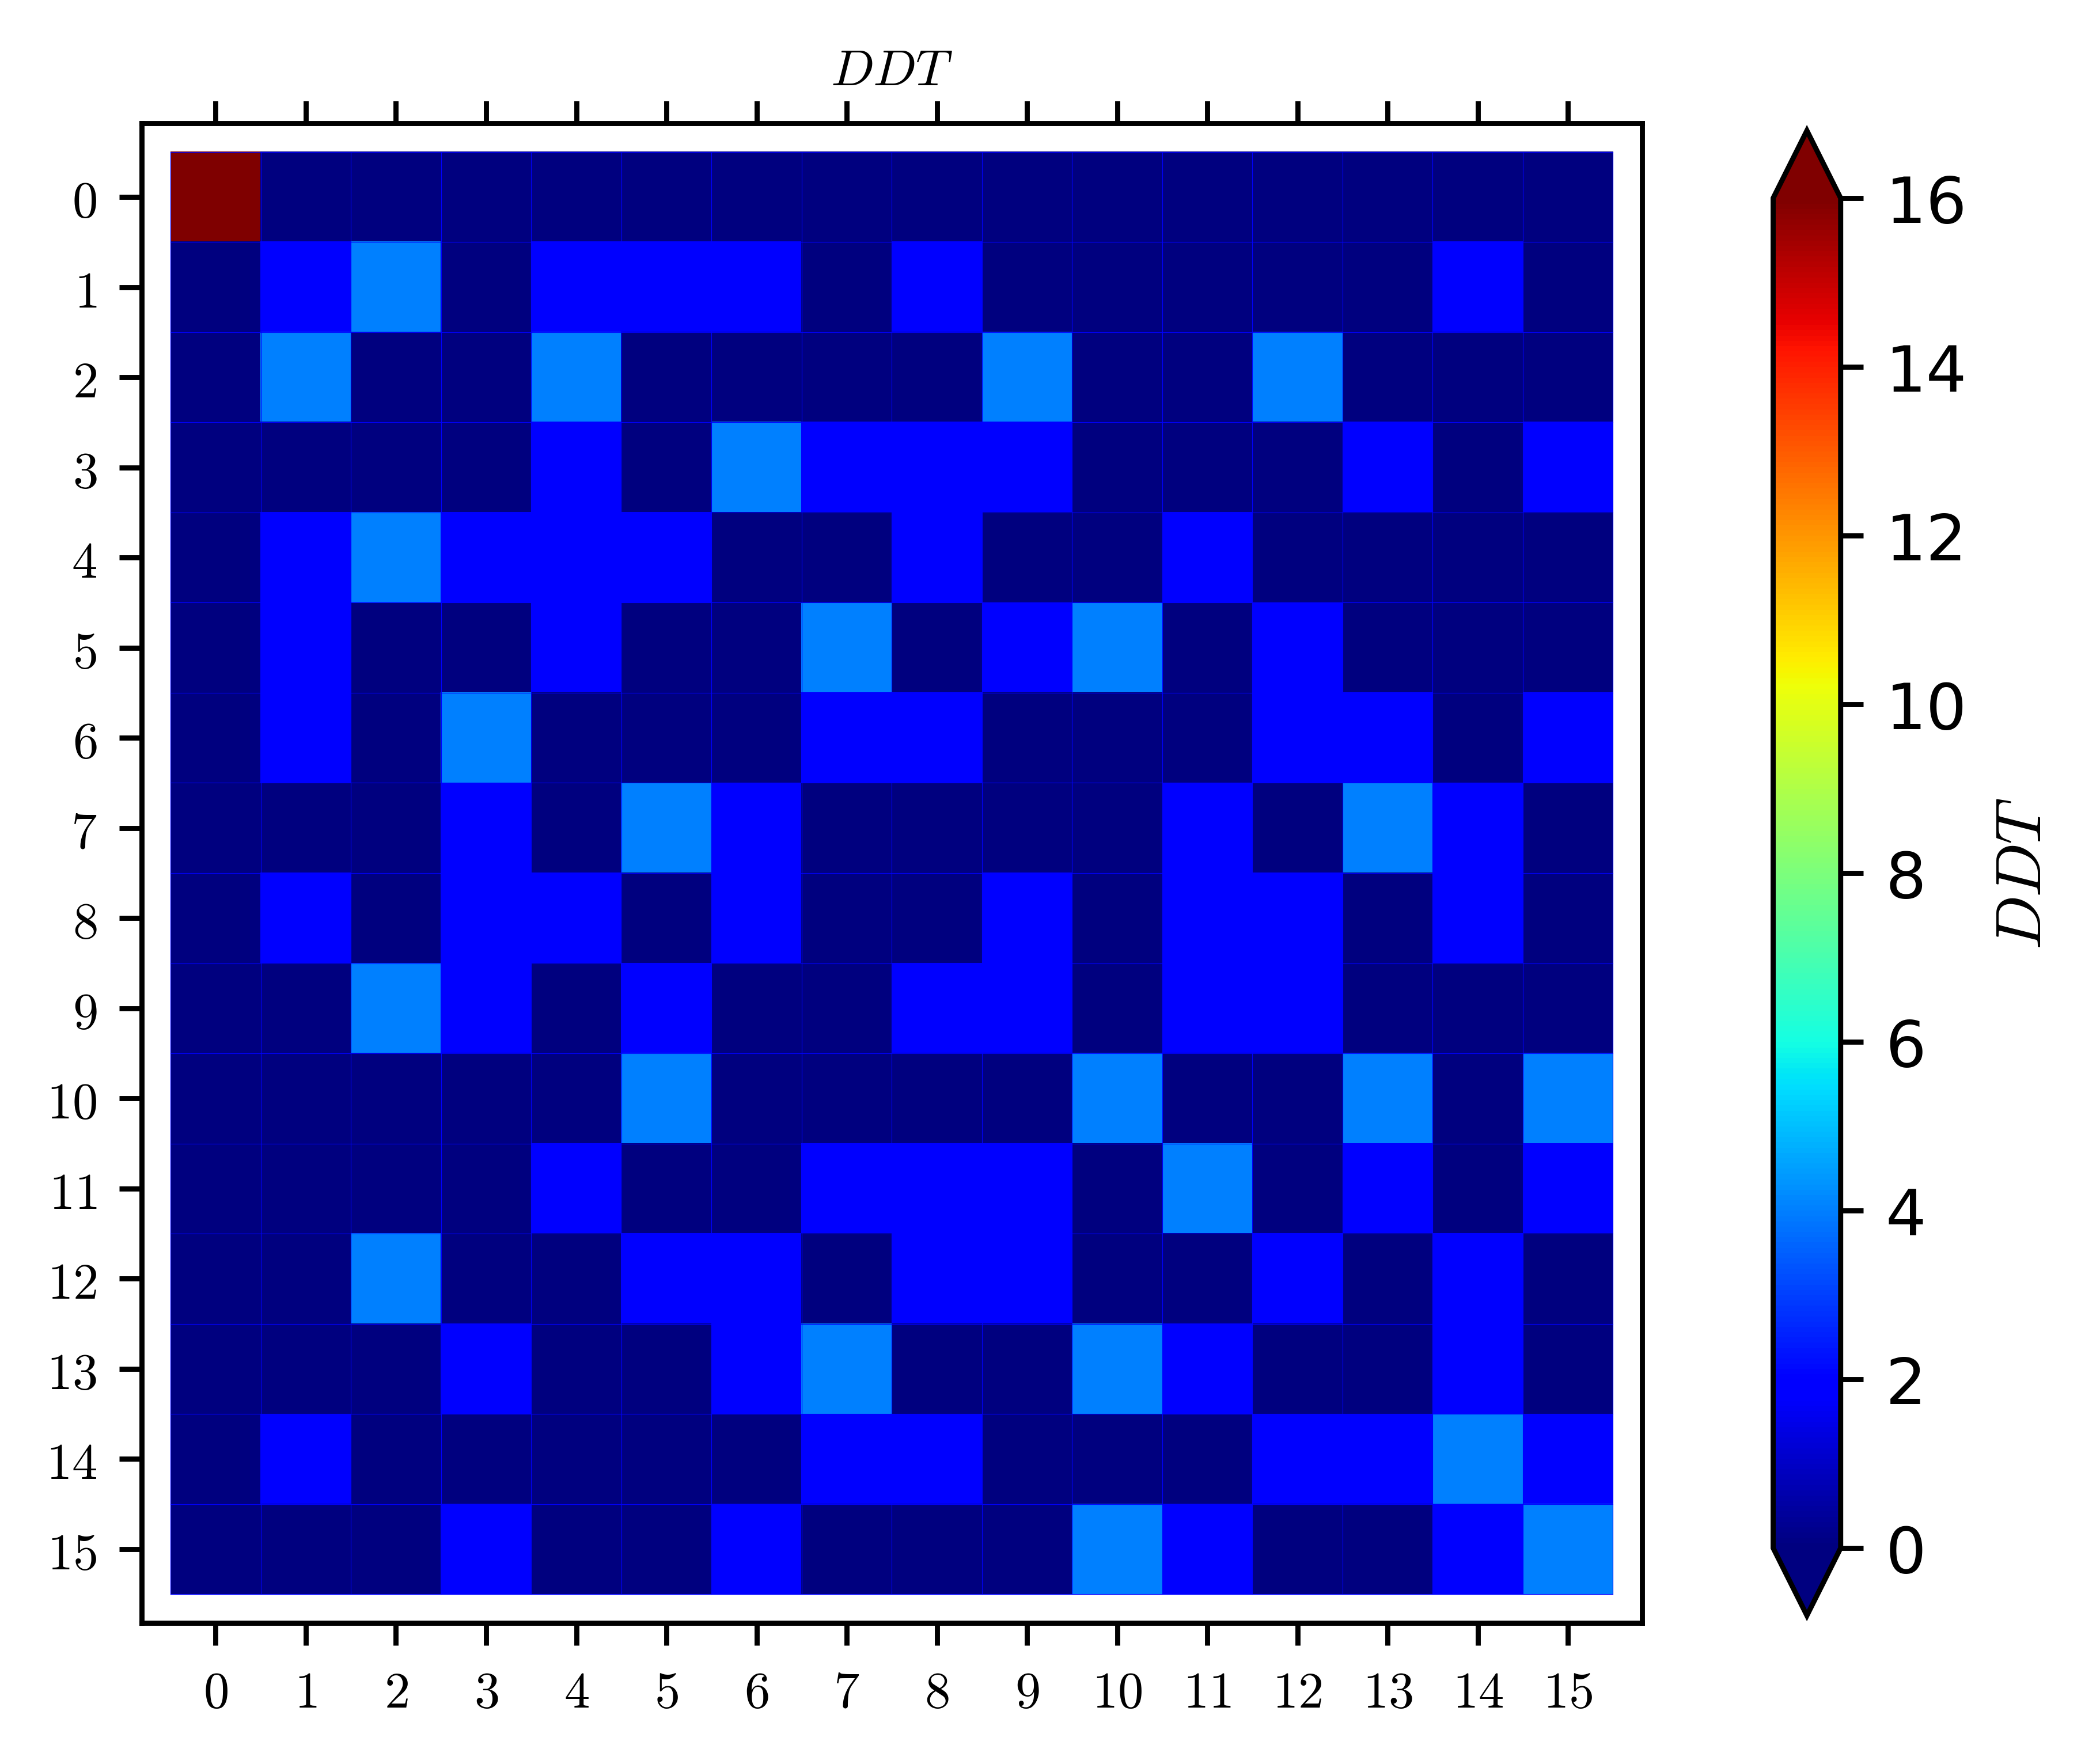

In [26]:
data = [[i, j] for i in range(16) for j in range(16)]
m = matrix(RR, 16,16)
for x,y in data:
    m[x,y] = ddt[x, y]
v_max = max(m.list())
v_min = min(m.list())
v_tixks = list(range(0, 16, 1))#[x for x in range(100) if v_max in m[x, :].list()]
h_tixks = list(range(0, 16, 1))#[y for y in range(100) if v_max in m[:, y].list()]
m_plot_middle_7r = matrix_plot(m, subdivisions = True, cmap = cm.jet,
                               flip_y = False,
                               ticks = [h_tixks, v_tixks], tick_formatter = ["latex", "latex"],
                               vmin = v_min, vmax = v_max, subdivision_boundaries=[range(101),range(101)], 
                               subdivision_style=[dict(linestyle = '-', color = 'blue',thickness=0.1),
                                                  dict(linestyle = '-', color = 'blue', thickness=0.1)], 
                               colorbar = True, colorbar_options={'shrink':0.99,
                                                                  'label' : '$DDT$',
                                                                  'extend' : 'both'},
                               title = '$DDT$', frame = true, fontsize = 8, dpi = 800, 
                               xmin = -0.5, xmax = 15.5, ymin = 15.5, ymax = -0.5)
m_plot_middle_7r.save_image('ddt.svg')
m_plot_middle_7r.show()

<a name="8_rounds"></a>
# 8 Rounds

In [12]:
p_e0 = [0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0, 0.25]

## Pbm-8 Rounds

In [48]:
s = 0
for i in range(15):
        s += p_e0[i]^2 * r7[i, 9]
print('p_bm = 2^%0.4f' % s.log2())

p_bm = 2^-28.0019


In [49]:
s = 0
for i in range(15):
    for j in range(15):
        s += p_e0[i] * p_e0[j] * R7r[i][j][9][9]
print('p_bm = 2^%0.4f' % s.log2())

p_bm = 2^-27.6612


<a name="9_rounds"></a>
# 9 Rounds

## E0-9 Rounds

In [50]:
p_e0 = [0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0, 0.25]

## E1-9 Rounds

In [51]:
p_e1 = [0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0, 0.25]

## Pbm-9 Rounds

In [52]:
s = 0
for i in range(15):
    for j in range(15):
        s += p_e0[i]^2 * p_e1[j]^2 * r7[i, j]
print('p_bm = 2^%0.4f' % s.log2())

p_bm = 2^-15.4316


In [53]:
s = 0
for i in range(15):
    for j in range(15):
        for k in range(15):
            for L in range(15):
                s += p_e0[i] * p_e0[j] * R7r[i][j][k][L] * p_e1[k] * p_e1[L]
print('p_bm = 2^%0.4f' % s.log2())

p_bm = 2^-14.7672


---

<a name="10_rounds"></a>
# 10 Rounds

## E0-10 Rounds

In [61]:
p_e0 = [0.0078125, 0.0, 0.015625, 0.0078125, 0.015625, 0.015625, 0.03125, 0.0, 0.0078125, 0.0625, 0.015625, 0.0078125, 0.015625, 0.015625, 0.03125]

## E1-10 Rounds 

In [62]:
p_e1 = [0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0, 0.25]

## Pbm-10 Rounds

In [63]:
s = 0
for i in range(15):
    for j in range(15):        
        s += p_e0[i]^2 * p_e1[j]^2 * r7[i, j]
print('p_bm = 2^%0.4f' % s.log2())

p_bm = 2^-20.4170


In [64]:
s = 0
for i in range(15):
    for j in range(15):
        for k in range(15):
            for L in range(15):
                s += p_e0[k] * p_e0[L] * R7r[i][j][k][L] * p_e1[i] * p_e1[j]
print('p_bm = 2^%0.4f' % s.log2())

p_bm = 2^-19.8365


In [65]:
p_e0 = [0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0, 0.25]

In [66]:
p_e1 = [0.0078125, 0.0, 0.015625, 0.0078125, 0.015625, 0.015625, 0.03125, 0.0, 0.0078125, 0.0625, 0.015625, 0.0078125, 0.015625, 0.015625, 0.03125]

In [67]:
s = 0
for i in range(15):
    for j in range(15):
        for k in range(15):
            for L in range(15):
                s += p_e0[k] * p_e0[L] * R7r[i][j][k][L] * p_e1[i] * p_e1[j]
print('p_bm = 2^%0.4f' % s.log2())

p_bm = 2^-19.8365


---

<a name="11_rounds"></a>
# 11 Rounds

## E0-11 Rounds

In [68]:
p_e0 = [0.0078125, 0.0, 0.015625, 0.0078125, 0.015625, 0.015625, 0.03125, 0.0, 0.0078125, 0.0625, 0.015625, 0.0078125, 0.015625, 0.015625, 0.03125]

## E1-11 Rounds

In [69]:
p_e1 = [0.0078125, 0.0, 0.015625, 0.0078125, 0.015625, 0.015625, 0.03125, 0.0, 0.0078125, 0.0625, 0.015625, 0.0078125, 0.015625, 0.015625, 0.03125]

## Pbm-11 Rounds

In [70]:
s = 0
for i in range(15):
    for j in range(15):        
        s += p_e0[i]^2 * p_e1[j]^2 * r7[i, j]
print('p_bm = 2^%0.4f' % s.log2())

p_bm = 2^-25.3964


In [71]:
s = 0
for i in range(15):
    for j in range(15):
        for k in range(15):
            for L in range(15):
                s += p_e0[i] * p_e0[j] * R7r[i][j][k][L] * p_e1[k] * p_e1[L]
print('p_bm = 2^%0.4f' % s.log2())

p_bm = 2^-24.9005


---

<a name="12_rounds"></a>
# 12 Rounds

## E0-12 Rounds

In [72]:
p_e0 = [0.0001068115234375, 6.103515625e-05, 0.0003509521484375, 0.0001068115234375, 0.001251220703125, 0.0003509521484375, 0.000244140625, 0.000152587890625, 0.0001068115234375, 0.0013427734375, 0.0003509521484375, 0.0001068115234375, 0.0013427734375, 0.0003509521484375, 0.0013427734375]

## E1-12 Rounds

In [73]:
p_e1 = [0.0078125, 0.0, 0.015625, 0.0078125, 0.015625, 0.015625, 0.03125, 0.0, 0.0078125, 0.0625, 0.015625, 0.0078125, 0.015625, 0.015625, 0.03125]

## Pbm-12 Rounds 

In [74]:
s = 0
for i in range(15):
    for j in range(15):        
        s += p_e0[i]^2 * p_e1[j]^2 * r7[i, j]
print('p_bm = 2^%0.4f' % s.log2())

p_bm = 2^-35.4949


In [75]:
s = 0
for i in range(15):
    for j in range(15):
        for k in range(15):
            for L in range(15):
                s += p_e0[i] * p_e0[j] * R7r[i][j][k][L] * p_e1[k] * p_e1[L]
print('p_bm = 2^%0.4f' % s.log2())

p_bm = 2^-34.8973


---

<a name="13_rounds"></a>
# 13 Rounds

## E0-13 Rounds

In [76]:
p_e0 = [0.0001068115234375, 6.103515625e-05, 0.0003509521484375, 0.0001068115234375, 0.001251220703125, 0.0003509521484375, 0.000244140625, 0.000152587890625, 0.0001068115234375, 0.0013427734375, 0.0003509521484375, 0.0001068115234375, 0.0013427734375, 0.0003509521484375, 0.0013427734375]

## E1-13 Rounds

In [77]:
p_e1 = [0.0001068115234375, 6.103515625e-05, 0.0003509521484375, 0.0001068115234375, 0.001251220703125, 0.0003509521484375, 0.000244140625, 0.000152587890625, 0.0001068115234375, 0.0013427734375, 0.0003509521484375, 0.0001068115234375, 0.0013427734375, 0.0003509521484375, 0.0013427734375]

## Pbm-13 Rounds 

In [78]:
s = 0
for i in range(15):
    for j in range(15):        
        s += p_e0[i]^2 * p_e1[j]^2 * r7[i, j]
print('p_bm = 2^%0.4f' % s.log2())

p_bm = 2^-45.5867


In [79]:
s = 0
for i in range(15):
    for j in range(15):
        for k in range(15):
            for L in range(15):
                s += p_e0[i] * p_e0[j] * R7r[i][j][k][L] * p_e1[k] * p_e1[L]
print('p_bm = 2^%0.4f' % s.log2())

p_bm = 2^-44.8903


---

<a name="14_rounds"></a>
# 14 Rounds

## E0-14 Rounds

In [80]:
p_e0 = [0.0001068115234375, 6.103515625e-05, 0.0003509521484375, 0.0001068115234375, 0.001251220703125, 0.0003509521484375, 0.000244140625, 0.000152587890625, 0.0001068115234375, 0.0013427734375, 0.0003509521484375, 0.0001068115234375, 0.0013427734375, 0.0003509521484375, 0.0013427734375]

## E1-14 Rounds

In [81]:
p_e1 = [1.1762604117393494e-06, 4.842877388000488e-08, 2.496875822544098e-06, 1.1762604117393494e-06, 2.4978071451187134e-06, 2.496875822544098e-06, 4.544854164123535e-06, 3.110617399215698e-07, 1.1762604117393494e-06, 8.922070264816284e-06, 2.496875822544098e-06, 1.1762604117393494e-06, 2.7604401111602783e-06, 2.496875822544098e-06, 4.950910806655884e-06]

## Pbm-14 Rounds 

In [82]:
s = 0
for i in range(15):
    for j in range(15):        
        s += p_e0[i]^2 * p_e1[j]^2 * r7[i, j]
print('p_bm = 2^%0.4f' % s.log2())

p_bm = 2^-60.9582


In [83]:
s = 0
for i in range(15):
    for j in range(15):
        for k in range(15):
            for L in range(15):
                s += p_e0[i] * p_e0[j] * R7r[i][j][k][L] * p_e1[k] * p_e1[L]
print('p_bm = 2^%0.4f' % s.log2())

p_bm = 2^-60.3391
